# Naive Bayes 

Accuracy: 0.9555555555555556


Text(0.5, 1.0, 'Naive Bayes')

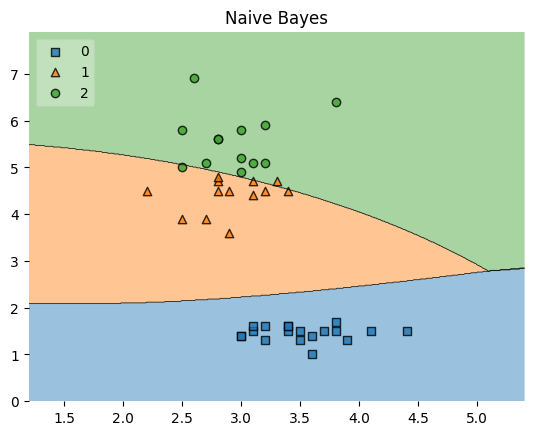

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

# Load the iris dataset from scikit-learn
iris = datasets.load_iris()
X = np.array(iris.data)
y= np.array(iris.target)
X=X[:,1:3]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
X.shape

plot_decision_regions(X_test,y_test,nb_classifier,legend=2)
plt.title("Naive Bayes")

### 2
